In [1]:
train_imgs_p = '/kaggle/input/breast-cancer-semantic-segmentation-bcss/BCSS/train'
train_masks_p = '/kaggle/input/breast-cancer-semantic-segmentation-bcss/BCSS/train_mask'

test_imgs_p = '/kaggle/input/breast-cancer-semantic-segmentation-bcss/BCSS/test'

val_imgs_p = '/kaggle/input/breast-cancer-semantic-segmentation-bcss/BCSS/val'
val_masks_p = '/kaggle/input/breast-cancer-semantic-segmentation-bcss/BCSS/val_mask'

In [2]:
import os
import cv2
import numpy as np

In [3]:
train_imgs_paths = ['/'.join([train_imgs_p, img]) for img in os.listdir(train_imgs_p)]
train_masks_paths = ['/'.join([train_masks_p, img]) for img in os.listdir(train_masks_p)]

val_imgs_paths = ['/'.join([val_imgs_p, img]) for img in os.listdir(val_imgs_p)]
val_masks_paths = ['/'.join([val_masks_p, img]) for img in os.listdir(val_masks_p)]

test_imgs_paths = ['/'.join([test_imgs_p, img]) for img in os.listdir(test_imgs_p)]

In [4]:
train_imgs = [np.asarray(cv2.imread(img_path)) for img_path in train_imgs_paths[:5000]]
test_imgs = [np.asarray(cv2.imread(img_path)) for img_path in test_imgs_paths]
val_imgs = [np.asarray(cv2.imread(img_path)) for img_path in val_imgs_paths]

In [5]:
train_masks = [np.asarray(cv2.imread(img_path)) for img_path in train_masks_paths[:5000]]
val_masks = [np.asarray(cv2.imread(img_path)) for img_path in val_masks_paths]

In [6]:
def display_target(target_arr):
  normalized_arr = (target_arr.astype('uint8') - 1) * 127
  plt.axis('off')
  plt.imshow(normalized_arr[:, :, 0])

In [7]:
import matplotlib.pyplot as plt

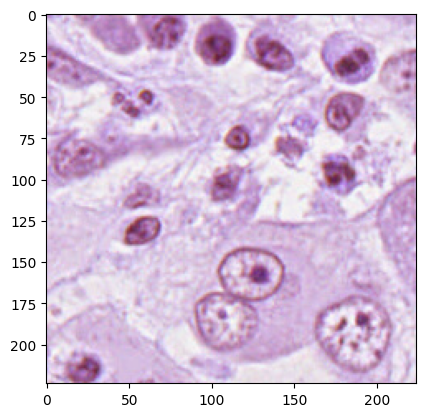

In [8]:
plt.imshow(train_imgs[1]);

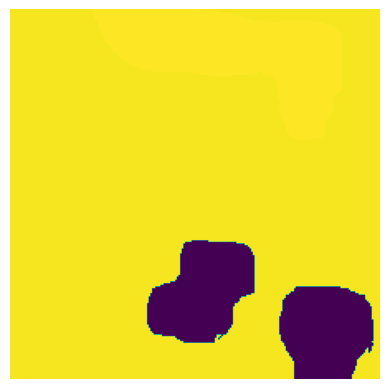

In [9]:
display_target(train_masks[1])

In [10]:
train_masks = list(map(lambda x: x.astype('uint8'), train_masks))
val_masks = list(map(lambda x: x.astype('uint8'), val_masks))

In [11]:
train_imges = np.array(train_imgs)
test_images = np.array(test_imgs)
val_img = np.array(val_imgs)

train_masks = np.array(train_masks)
val_masks = np.array(val_masks)

In [12]:
train_imges.shape

(5000, 224, 224, 3)

In [13]:
train_masks.shape

(5000, 224, 224, 3)

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

In [28]:
def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))
    x = layers.Rescaling(1./255)(inputs)

    x = layers.Conv2D(64, 3, strides=2, activation='relu', padding='same')(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.Conv2D(128, 3, strides=2, activation='relu', padding='same')(x)
    x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
    x = layers.Conv2D(256, 3, strides=2, activation='relu', padding='same')(x)
    x = layers.Conv2D(256, 3, activation='relu', padding='same')(x)

    x = layers.Conv2DTranspose(256, 3, activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(256, 3, activation='relu', padding='same', strides=2)(x)
    x = layers.Conv2DTranspose(128, 3, activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(128, 3, activation='relu', padding='same', strides=2)(x)
    x = layers.Conv2DTranspose(64, 3, activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(64, 3, activation='relu', padding='same', strides=2)(x)

    outputs = layers.Conv2D(num_classes, 3, activation='softmax', padding='same')(x)
    model = keras.Model(inputs, outputs)

    return model

In [29]:
model = get_model(img_size=(224, 224), num_classes=3)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 64)      1792      
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 conv2d_9 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 conv2d_10 (Conv2D)          (None, 56, 56, 128)       147584    
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 256)       2951

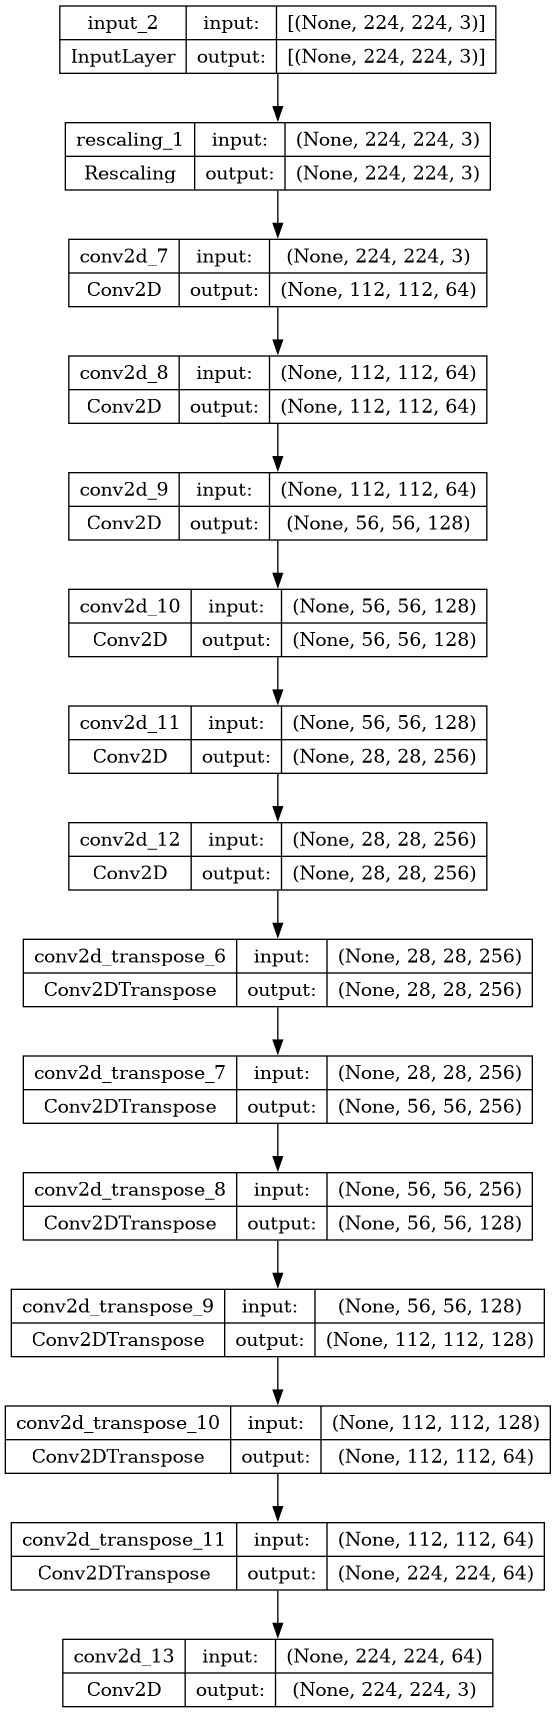

In [30]:
keras.utils.plot_model(model, show_shapes=True)

In [31]:
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy'
)

In [32]:
callbacks = [
    keras.callbacks.ModelCheckpoint('segmentation', save_best_only=True)
]

In [ ]:
hist = model.fit(
    train_imgs, train_masks,
    validation_data=(val_imgs, val_masks),
    epochs=50,
    callbacks=callbacks,
    batch_size=64,
    verbose=2s
)